# Part 4: Review Code Request

<br> 

<div align="center">
    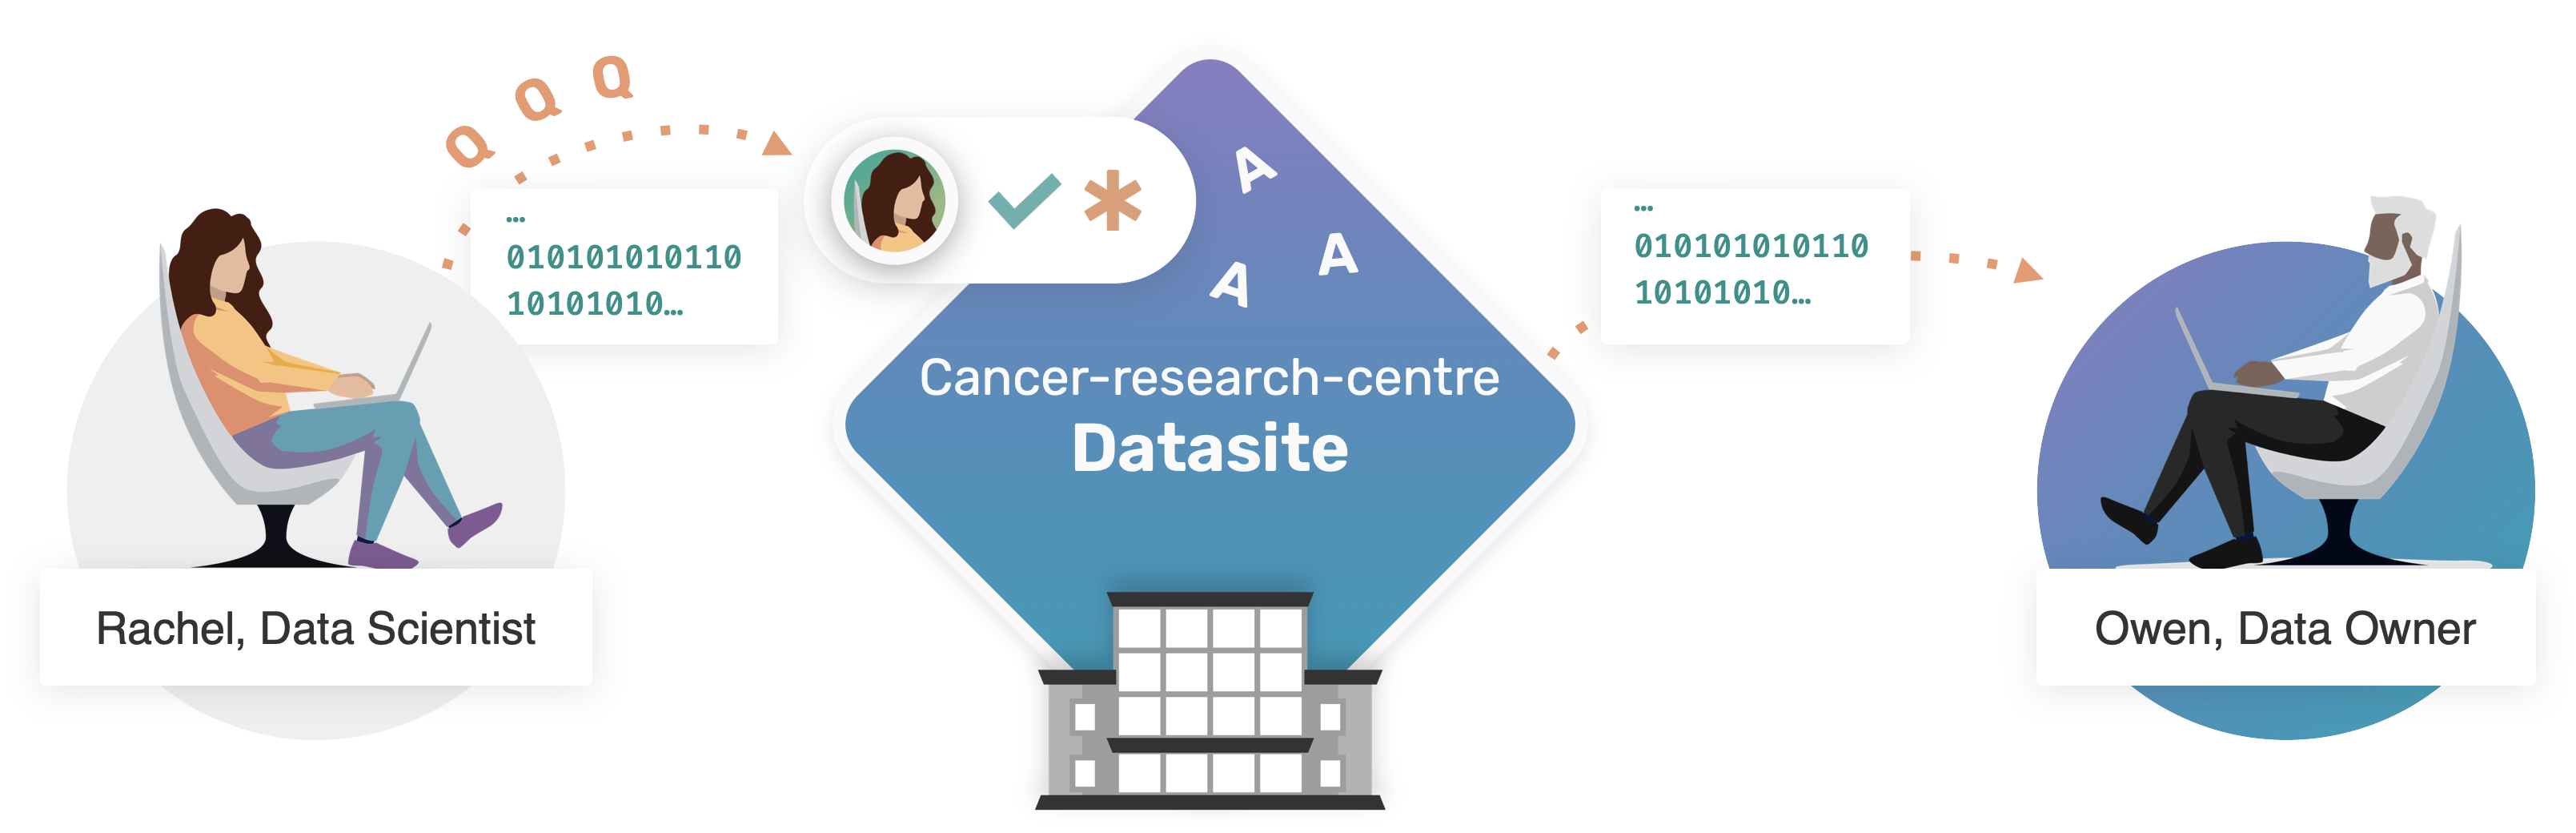
</div>

<br>

By now, we have seen how Rachel could submit her research project through PySyft, which is now waiting for review by Owen, the data owner.

## What you will learn

By the end of **part 4** you will learn:

- How to access incoming projects requests; 
- How to review user code;
- How to approve a code request.


## |:data_scientist:| 4.1. Review Incoming Requests

<br>


<div align="center">
    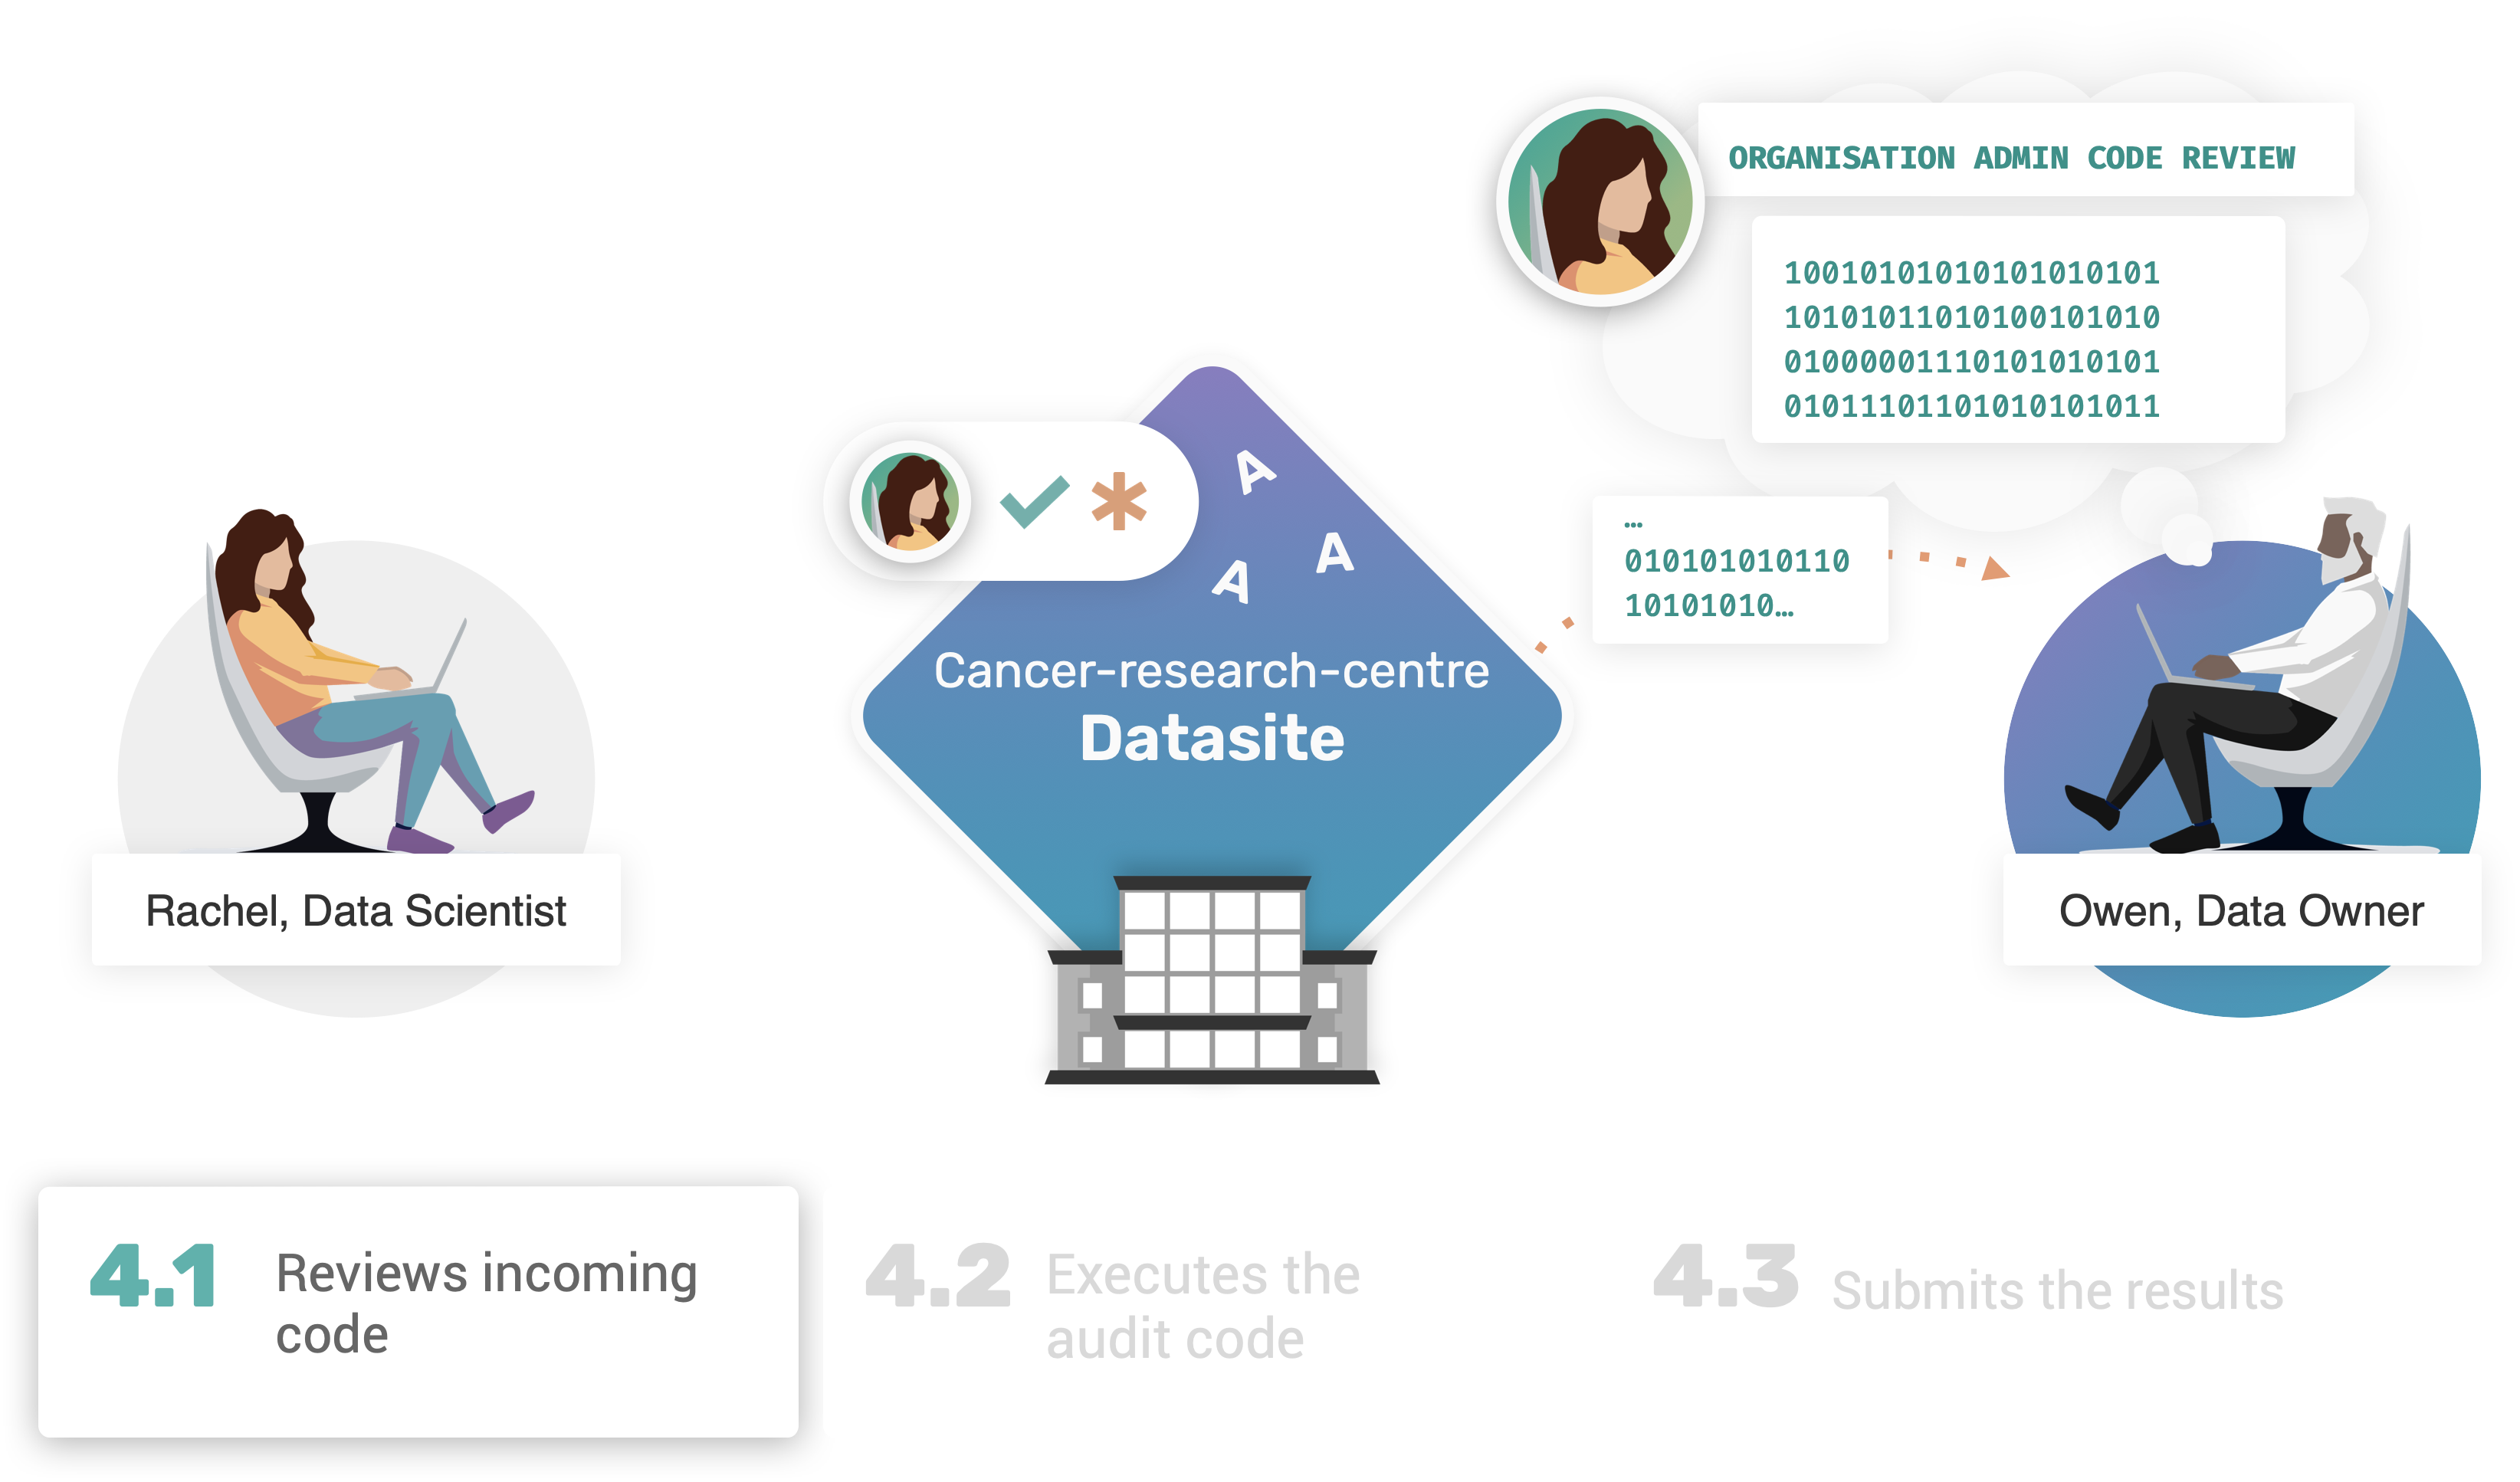
</div>

<br>

As always, the first step will be to login to the Datasite. This time, we will login using Owen's credentials as a data owner.

In [1]:
import syft as sy

data_site = sy.orchestra.launch(name="cancer-research-centre")

client = data_site.login(email="owen@cancer-research.science", password="cancer_research_syft_admin")

SyftInfo: You have launched a development server at http://0.0.0.0:None.It is intended only for local use.

Logged into <cancer-research-centre: High side Datasite> as <owen@cancer-research.science>


Then, we can get access to existing projects through our `client` instance:

In [2]:
client.projects

As expected, the Datasite currently includes a request from Rachel for her "Breast Cancer ML Project". Looking at the description, Owen can get a general understanding of what to expect in the incoming code request. 

Let's get access to the request, to be further inspected. Existing requests can be accessed by `index`:

In [3]:
request = client.requests[0]
request

syft.service.request.request.Request

Starting fromt the `request` object, we can immediately get a reference to the code associated to it. This code corresponds to the code submitted by the data scientist, and attached to the original project.

Before proceeding to test the code execution, the data owner can _review_ the code, and double check that the expectations set in the project description are met:

In [4]:
request.code

```python
def ml_experiment_on_breast_cancer_data(features_data, labels, seed: int = 12345) -> tuple[float, float]:
    # include the necessary imports in the main body of the function
    # to prepare for what PySyft would expect for submitted code.
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    X, y = features_data, labels.values.ravel()
    # 1. Data Partition
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)
    # 2. Data normalisation
    scaler = StandardScaler()
    scaler.fit(X_train, y_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # 3. Model training
    model = LogisticRegression().fit(X_train, y_train)
    # 4. Metrics Calculation
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = accuracy_score(y_test, model.predict(X_test))

    return acc_train, acc_test
```

```{warning} Privacy & Security Code Review

Code reviews must go through a security and privacy assessment before approval. To ensure the privacy is respected, the data owner must check the code abides to their own data release rules. To ensure security, it is good practice to keep an eye for malicious code requests. Here are a few security code review links which you might find useful:

- [OWASP Reference Manual](https://owasp.org/www-pdf-archive/OWASP_Code_Review_Guide_v2.pdf)
- [Security Code Reviews](https://www.techtarget.com/searchsecurity/tip/How-to-conduct-a-secure-code-review)
- [Codacity](https://blog.codacy.com/best-practices-security-code-reviews)
```

## |:data_scientist:| 4.2. Execute Code

<div align="center">
    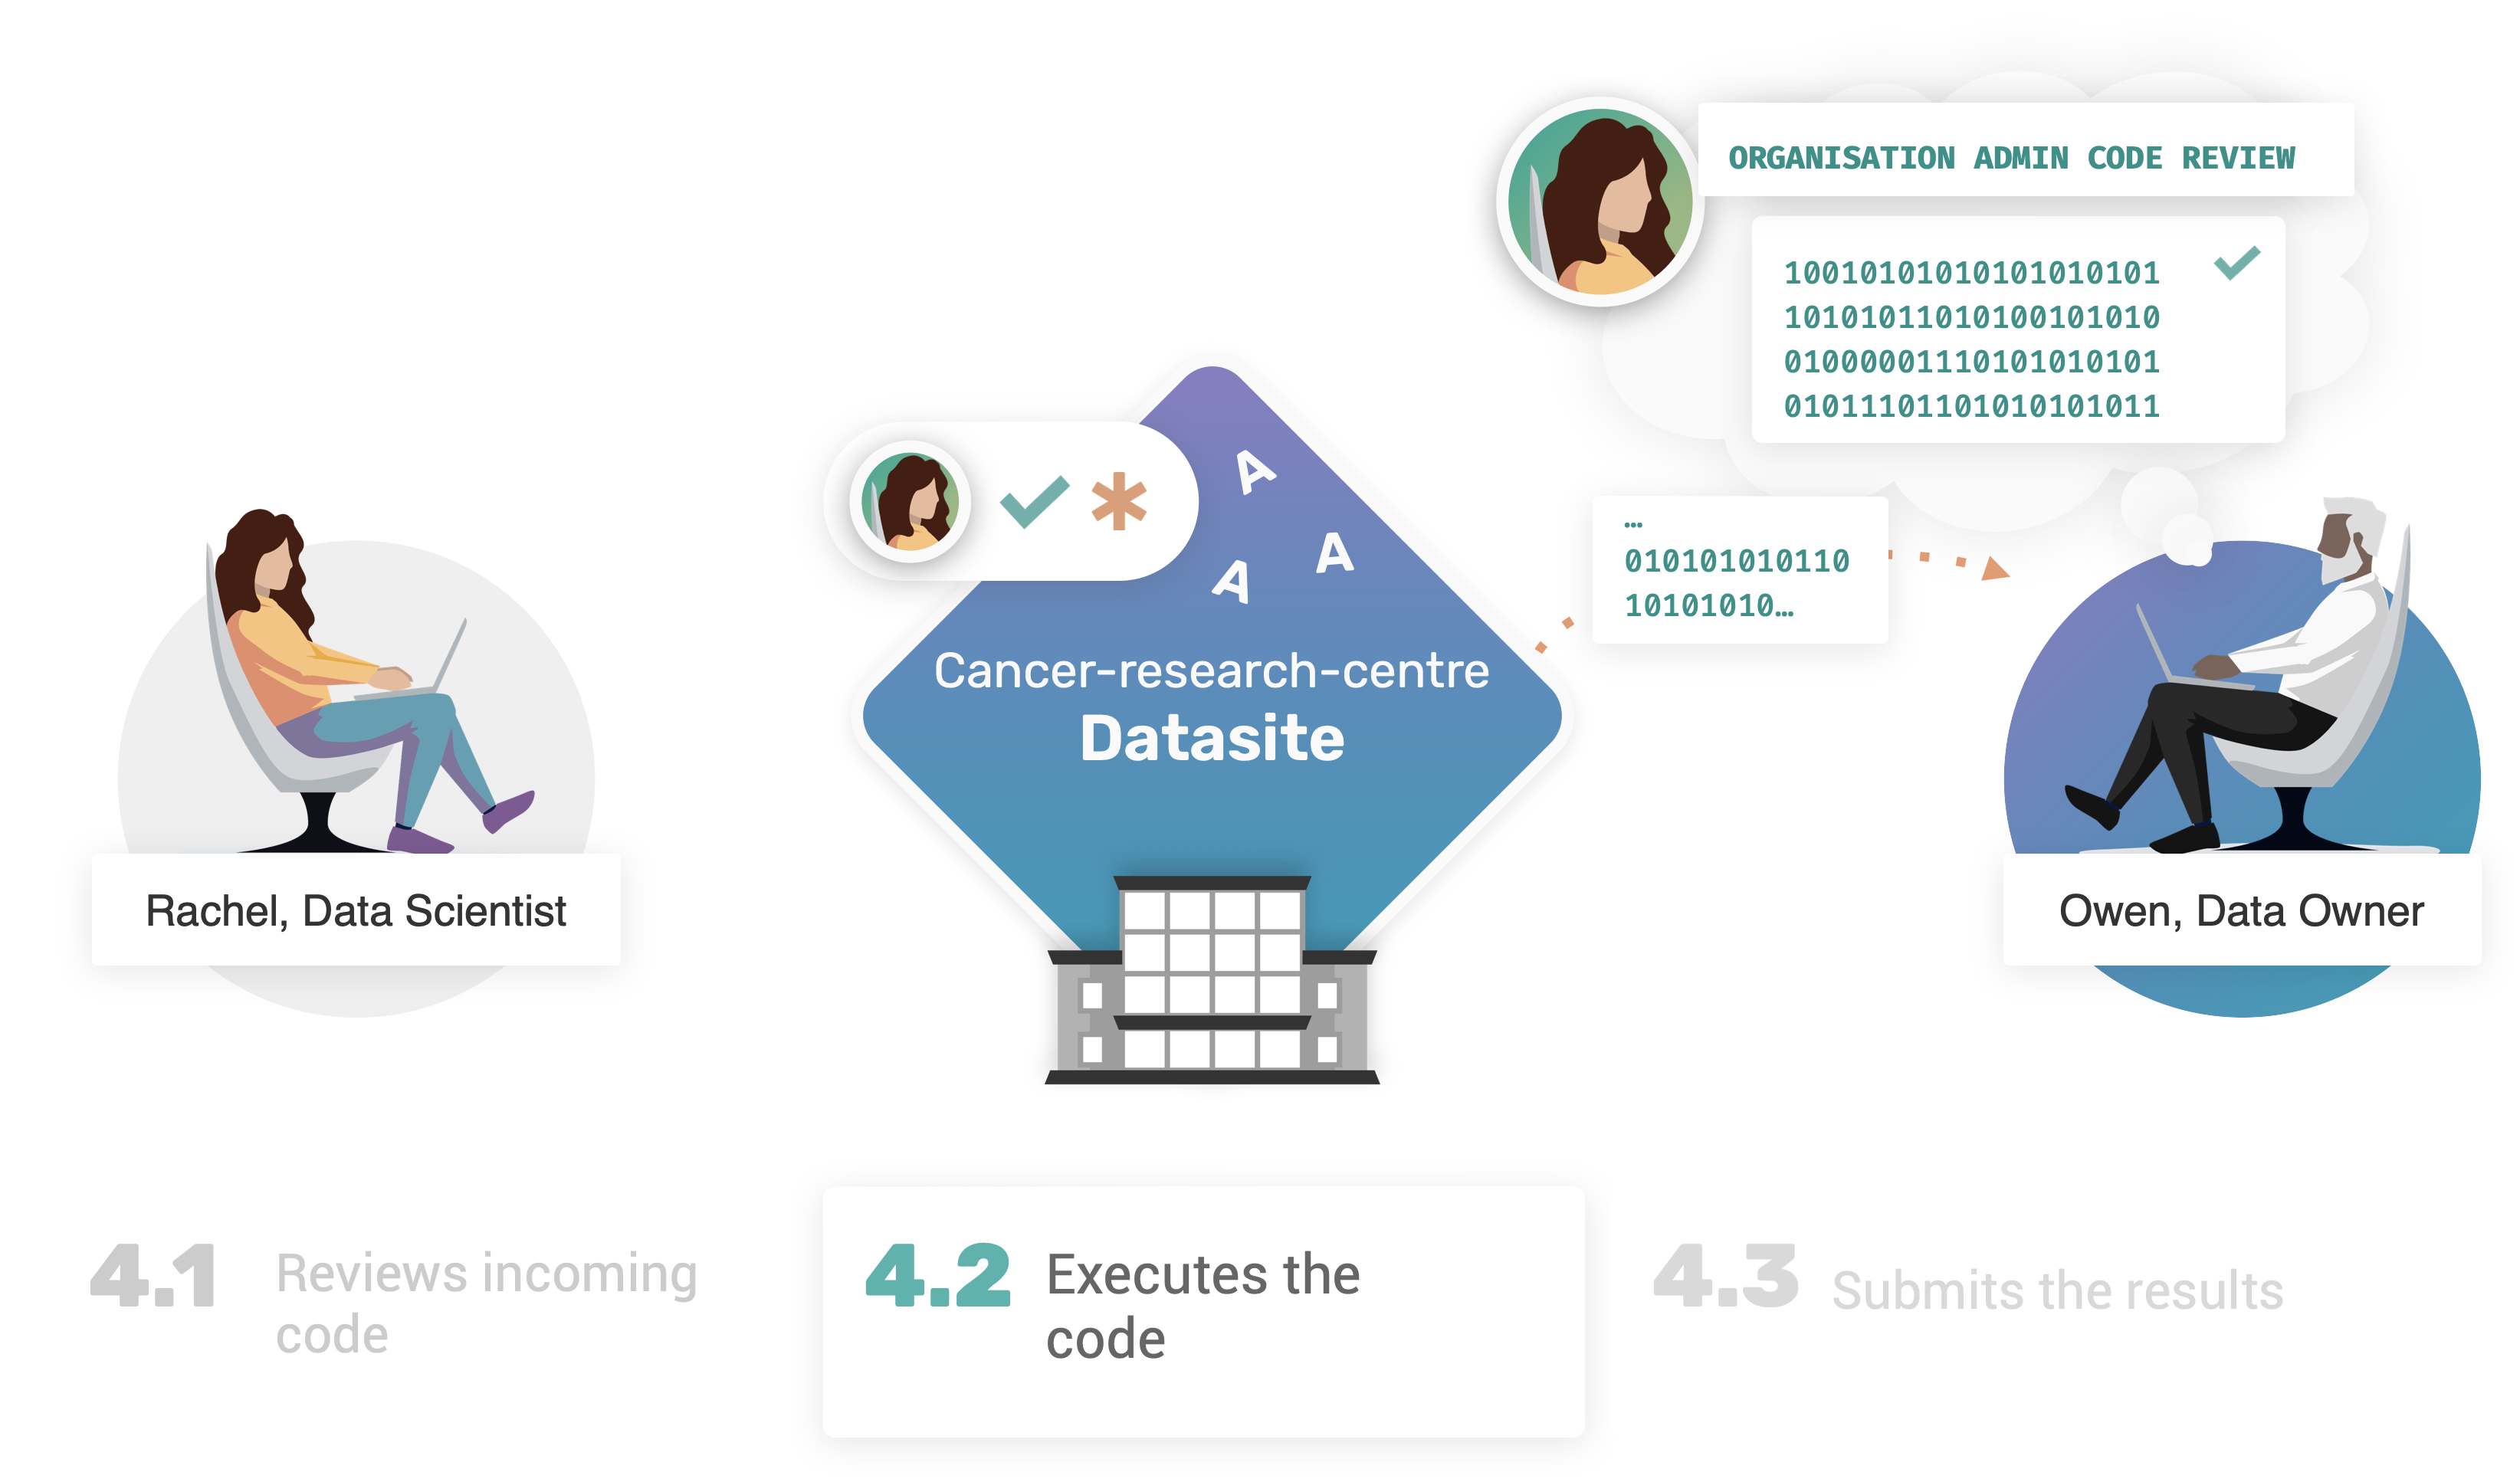
</div>

After having reviewed the code, the next step for Owen would be to _execute_ the code on both the _mock_ and the _real_ data of the assets specified in the submitted code. 
After reviewing Rachel's code, we can see that the function expects both `features` and `labels` assets, as available in the "Breast Cancer Biomarker" dataset.

First, let's get the reference to the specific [**syft function**](../components/code-api.ipynb):

In [5]:
syft_function = request.code

Then, let's get access to the required assets:

In [6]:
bc_dataset = client.datasets["Breast Cancer Biomarker"]
features, labels = bc_dataset.assets

At this point, the data owner can first run the `syft_function` on `features.mock` and `targets.mock`, and then repeating the same for `features.data` and `labels.data`:

In [7]:
result_mock_data = syft_function.run(features_data=features.mock, labels=labels.mock)
result_mock_data

SyftWarning: This code was submitted by a User and could be UNSAFE.

(0.6737089201877934, 0.5874125874125874)

```{admonition} Execution on mock data

Results on mock data are _exactly the same_ as the one we originally obtained with Rachel's code in <b>part 3</b>. This is due by the fact that Rachel code is indeed using random seed properly, for reproducible results.
```

Checked that code runs on the mock data, we can test the code on the _real_ data, and gather the results Rachel is waiting for:

In [8]:
result_real_data = syft_function.run(features_data=features.data, labels=labels.data)
result_real_data

SyftWarning: This code was submitted by a User and could be UNSAFE.

(0.9859154929577465, 0.972027972027972)

## |:data_scientist:| 4.3. Approve the request

<br>

<div align="center">
    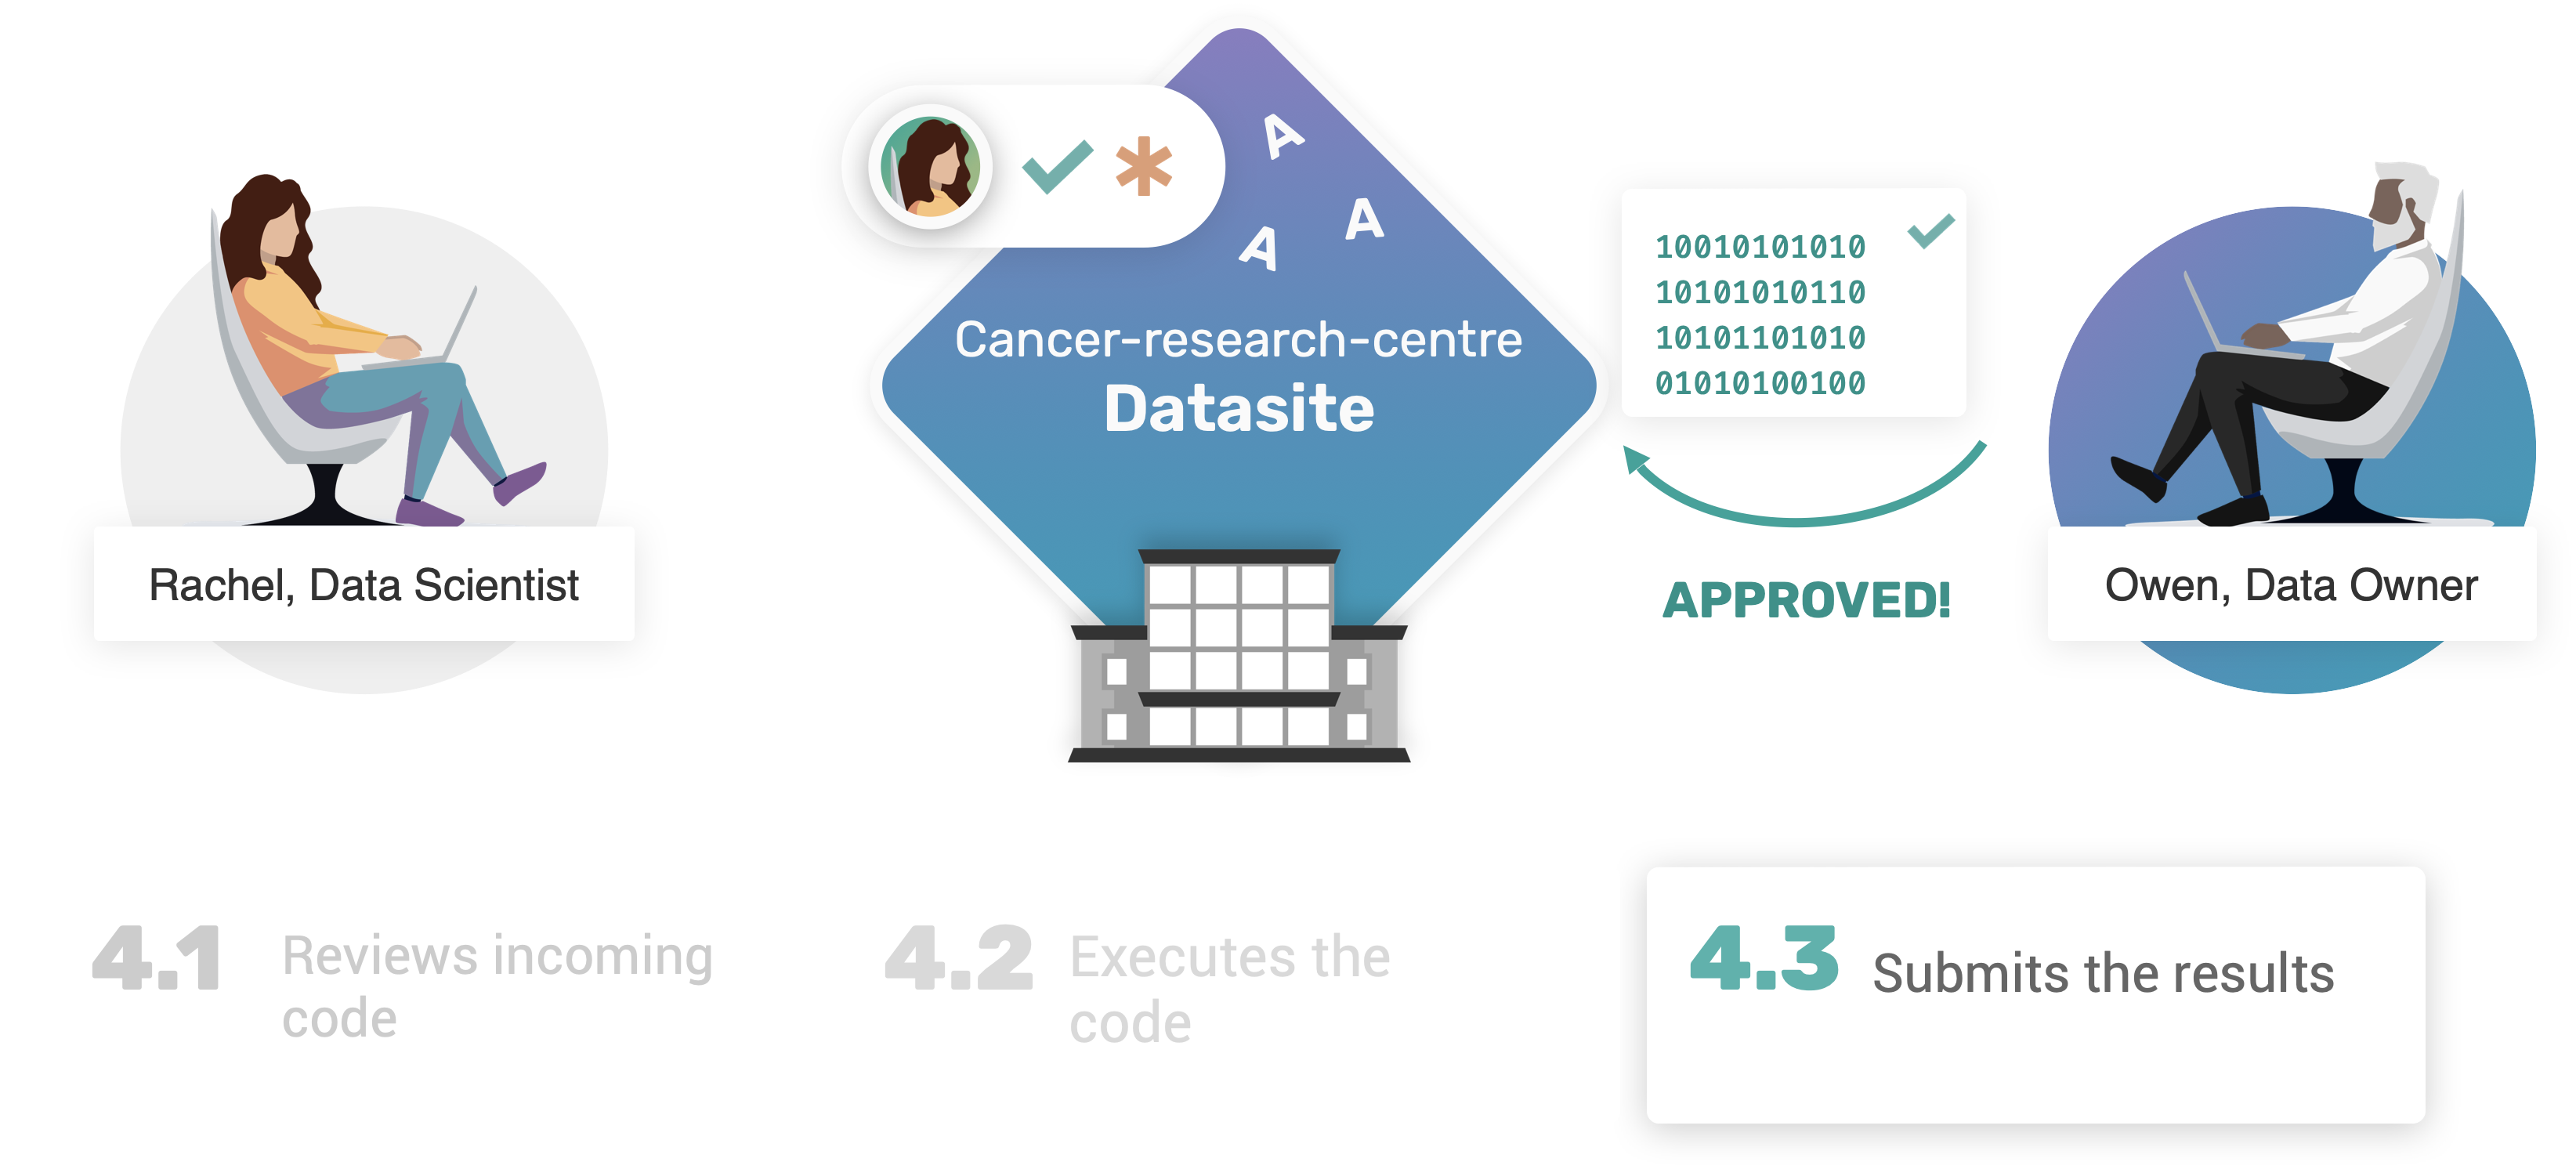
</div>

<br>

Now that we have reviewed, checked, and tested Rachel's function on the selected assets, and we also gathered the result on the real non-public data, Owen can proceed to **approve** the code request:

In [9]:
request.approve()

Approving request on change ml_experiment_on_breast_cancer_data for datasite cancer-research-centre


SyftSuccess: Request 500366fbe5eb48abb8670eed8242d1af changes applied

We can verify that the request has been approved, by looking at the status of current available requests:

In [10]:
client.requests

As expected, the status of Rachel's request is now **Approved**.

## Congrats on completing Part 4 🎉

Congratulations for completing **part 4** of the tutorial. 

In this part we have explored the entire workflow of request review, and approval in PySyft. In particular, after receiving a new request from Rachel, Owen could read the purpose of her study, review the submitted code, and checked that all the expectations and data access criteria were met. Finally, after having executed the code on both _mock_ and _real_ data, the request was approved. 

In the last part, [**part 5**](./part5-retrieving-results.ipynb), we will see how it will be possible for Rachel to retrieve the result she is waiting for, after receiving her request approved.